# Spam Detection : Wikipedia Project

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.cross_validation import KFold
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Load training dataset and encoding (with integers) the labels into two classes 

In [2]:
#Load train dataset
df = pd.read_csv("pr2.tsv", sep="\t")
#shuffle the dataframe so that samples will be randomly distributed in Cross Validation Folds
df = shuffle(df)
#Replace strings with integers : 1 for OK and 0 for Not OK
df["draft_quality"] = df["draft_quality"].replace({"OK" : 1, "vandalism" : 0, "spam" : 0, "attack" : 0})
#Put features and labels on differents dataframes
X=df.drop(["draft_quality"], 1)
Y=df["draft_quality"]

### Defining cross validation function
This method will enable us to train the models and anvoid overfitting

In [5]:
#Use Cross validation with 5 folds to tune models
kf = KFold(len(Y), n_folds=5)
#Transform dataframes to arrays to compute cross validation
X=np.array(X)
Y=np.array(Y)
def Cross_Validation(model):
    means_Accuracy=[]
    means_Recall=[]
    means_Fscore=[]
    for training,testing in kf:
        print("New iteration")
        model.fit(X[training], Y[training])
        prediction=model.predict(X[testing])
        curmean = np.mean(prediction == Y[testing])
        means_Accuracy.append(curmean)
        currecall=recall_score(Y[testing], prediction)
        means_Recall.append(currecall)
        curf1=f1_score(Y[testing], prediction)
        means_Fscore.append(curf1)
    return np.mean(means_Accuracy), np.mean(means_Recall),np.mean(means_Fscore)
    

## Modeling
It seems that we have 3 models that give the best results, we will try to take profit from the three of them

### Gradient Boosting

We will start by testing the model with its default settings, using the cross validation method

In [6]:
clf1 = xgb.XGBClassifier(objective='binary:logistic')
accuracy, recall, Fscore=Cross_Validation(clf1)
print("Accuracy with default settings:")
print(accuracy)
print("Recall with default settings:")
print(recall)
print("Fscore with default settings:")
print(Fscore)

New iteration
New iteration
New iteration
New iteration
New iteration
Accuracy with default settings:
0.942248403042
Recall with default settings:
0.936158332184
Fscore with default settings:
0.941885486616


Now after tuning the model's parameters, we oobtain the following results

In [7]:
clf1 = xgb.XGBClassifier(max_depth=6, objective='binary:logistic', n_estimators=500, colsample_bytree=0.4)
accuracy, recall, Fscore=Cross_Validation(clf1)
print("Accuracy after tuning the parameters:")
print(accuracy)
print("Recall after tuning the parameters:")
print(recall)
print("Fscore after tuning the parameters:")
print(Fscore)

New iteration
New iteration
New iteration
New iteration
New iteration
Accuracy after tuning the parameters:
0.95018851104
Recall after tuning the parameters:
0.938574307965
Fscore after tuning the parameters:
0.949593433325


### Neural Network
We will follow the exact same procedure for neural network

In [9]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier()
accuracy, recall, Fscore=Cross_Validation(clf2)
print("Accuracy with default settings:")
print(accuracy)
print("Recall with default settings:")
print(recall)
print("Fscore with default settings:")
print(Fscore)

New iteration
New iteration
New iteration
New iteration
New iteration
Accuracy with default settings:
0.838304793995
Recall with default settings:
0.764534382021
Fscore with default settings:
0.803212157621


In [10]:
clf2 = MLPClassifier(solver='adam', alpha=0.002,hidden_layer_sizes=(3, 2))
accuracy, recall, Fscore=Cross_Validation(clf2)
print("Accuracy after tuning the parameters:")
print(accuracy)
print("Recall after tuning the parameters:")
print(recall)
print("Fscore after tuning the parameters:")
print(Fscore)

New iteration
New iteration
New iteration
New iteration
New iteration
Accuracy after tuning the parameters:
0.744512573168
Recall after tuning the parameters:
0.954762732739
Fscore after tuning the parameters:
0.812215128864


### Random Forest
We will follow the exact same procedure for the random forest

In [12]:

clf3 = RandomForestClassifier()
accuracy, recall, Fscore=Cross_Validation(clf3)
print("Accuracy with default settings:")
print(accuracy)
print("Recall with default settings:")
print(recall)
print("Fscore with default settings:")
print(Fscore)

New iteration
New iteration
New iteration
New iteration
New iteration
Accuracy with default settings:
0.941448649677
Recall with default settings:
0.920359902453
Fscore with default settings:
0.940174718956


In [13]:
clf3 = RandomForestClassifier(n_estimators=500)
accuracy, recall, Fscore=Cross_Validation(clf3)
print("Accuracy after tuning the parameters:")
print(accuracy)
print("Recall after tuning the parameters:")
print(recall)
print("Fscore after tuning the parameters:")
print(Fscore)

New iteration
New iteration
New iteration
New iteration
New iteration
Accuracy after tuning the parameters:
0.946627855719
Recall after tuning the parameters:
0.930516958241
Fscore after tuning the parameters:
0.945748743133


## Validation
Now that we have tuned the parameters, we can try the models on the validation dataset

In [3]:
#Load the validation dataset
df2 = pd.read_csv("pr2v2.tsv", sep="\t")
df2["draft_quality"] = df2["draft_quality"].replace({"OK" : 1, "vandalism" : 0, "spam" : 0, "attack" : 0})
X2=df2.drop(["draft_quality"], 1)
Y2=df2["draft_quality"]
X2=np.array(X2)
Y2=np.array(Y2)
X=np.array(X)
Y=np.array(Y)

### Score obtained using gradient boosting

In [21]:
clf1 = xgb.XGBClassifier(max_depth=6, objective='binary:logistic', n_estimators=500, colsample_bytree=0.4)
clf1.fit(X, Y)
prediction_xgb=clf1.predict(X2)
accuracy_xgb = np.mean(prediction_xgb == Y2)
recall_xgb=recall_score(Y2, prediction_xgb)
f1score_xgb=f1_score(Y2, prediction_xgb)
print("xgb accuracy :")
print(accuracy_xgb)
print("xgb recall :")
print(recall_xgb)
print("xgb f1score :")
print(f1score_xgb)

xgb accuracy :
0.938222879502
xgb recall :
0.938427901737
xgb f1score :
0.967118242152


### Score obtained using neural network

In [24]:
clf2 = MLPClassifier(solver='adam', alpha=0.002,hidden_layer_sizes=(3, 2))
clf2.fit(X, Y)
prediction_nn=clf2.predict(X2)
accuracy_nn = np.mean(prediction_nn == Y2)
recall_nn=recall_score(Y2, prediction_nn)
f1score_nn=f1_score(Y2, prediction_nn)
print("nn accuracy :")
print(accuracy_nn)
print("nn recall :")
print(recall_nn)
print("nn f1score :")
print(f1score_nn)

nn accuracy :
0.911322673075
nn recall :
0.912194438875
nn f1score :
0.952192227707


### Score obtained using random forest

In [26]:
clf3 = RandomForestClassifier(n_estimators=500)
clf3.fit(X, Y)
prediction_rf=clf3.predict(X2)
accuracy_rf = np.mean(prediction_rf == Y2)
recall_rf=recall_score(Y2, prediction_rf)
f1score_rf=f1_score(Y2, prediction_rf)
print("rf accuracy :")
print(accuracy_nn)
print("rf recall :")
print(recall_rf)
print("nn f1score :")
print(f1score_rf)

rf accuracy :
0.951021351326
rf recall :
0.929214523721
nn f1score :
0.962325996068


### Combining the three models to construct our final model
Our final model is a combination of the three models using a voting system

In [7]:

from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('xgb', clf1), ('nn', clf2), ('rf', clf3)], voting='hard', weights=[1,1,1])
eclf.fit(X, Y)
prediction=eclf.predict(X2)
accuracy = np.mean(prediction == Y2)
recall=recall_score(Y2, prediction)
f1score=f1_score(Y2, prediction)
print(" accuracy :")
print(accuracy)
print(" recall :")
print(recall)
print(" f1score :")
print(f1score)

 accuracy :
0.942551683766
 recall :
0.943211220271
 f1score :
0.969502381451


## Plotting results
Here we provide some charts to visualize final results

### Plotting the metrics obtained, namely accuraxy , recall and f1 score

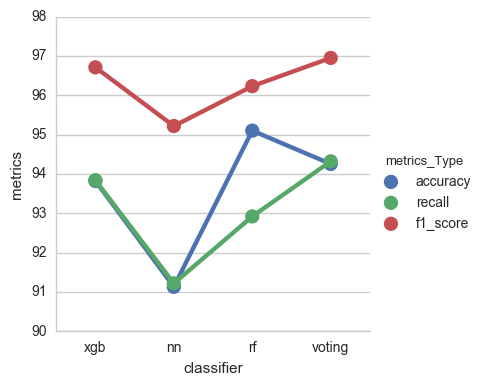

In [41]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
classifier=["xgb", "xgb", "xgb" ,"nn","nn","nn", "rf", "rf", "rf", "voting", "voting", "voting"]
metrics=[93.8222879502,93.8427901737,96.7118242152,91.1322673075,91.2194438875,95.2192227707,
         95.1021351326,92.9214523721,96.2325996068, 94.2551683766, 94.3211220271, 96.9502381451]
metrics_Type=["accuracy","recall","f1_score","accuracy","recall","f1_score","accuracy","recall",
              "f1_score","accuracy","recall","f1_score"]
d={'classifier': classifier, 'metrics':metrics, 'metrics_Type':metrics_Type}
To_Plot = pd.DataFrame(data=d)
sns.factorplot(x="classifier", y='metrics', hue="metrics_Type", data=To_Plot);#, kind="bar"


#### Confusion Matrix
By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.

In [42]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y2, prediction, labels=None, sample_weight=None)
confusion

array([[  9551,    802],
       [ 17844, 296373]])

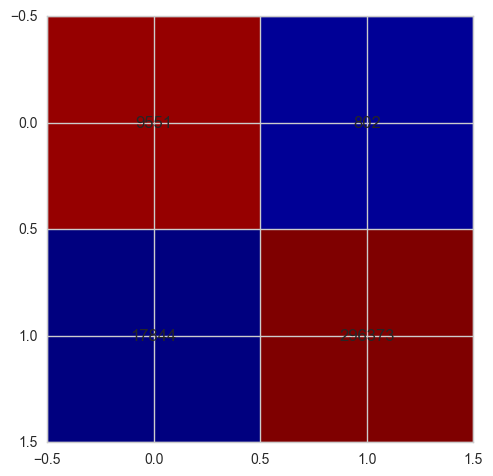

In [44]:
#Plotting the cofusion matrix
conf_arr=confusion
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

### Pie charts showing proportions of well classified VS missclassified (for each class)

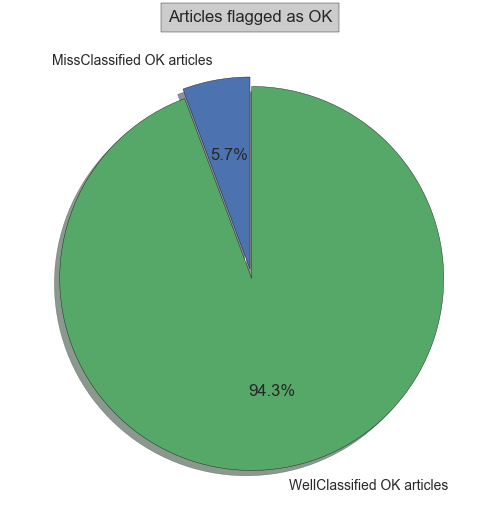

In [60]:
from pylab import *

figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])
labels = 'MissClassified OK articles', 'WellClassified OK articles'
fracs = [confusion[1,0]/(confusion[1,0]+confusion[1,1]), confusion[1,1]/(confusion[1,0]+confusion[1,1])]
explode=(0, 0.05)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Articles flagged as OK', bbox={'facecolor':'0.8', 'pad':5})

show()


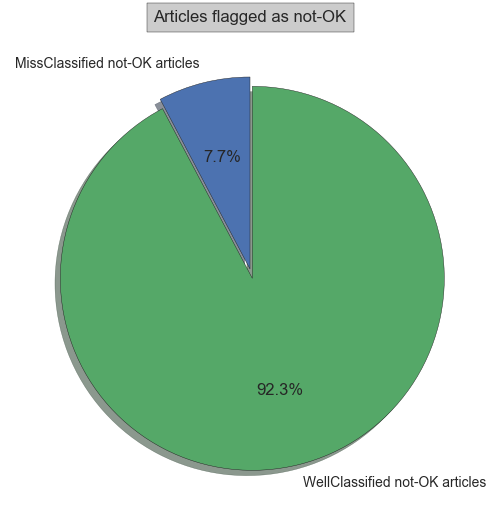

In [63]:
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = 'MissClassified not-OK articles', 'WellClassified not-OK articles' 
fracs = [confusion[0,1]/(confusion[0,0]+confusion[0,1]), confusion[0,0]/(confusion[0,0]+confusion[0,1])]
explode=(0, 0.05)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Articles flagged as not-OK', bbox={'facecolor':'0.8', 'pad':5})

show()
